In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = open("input.data")
input_data = f.read()
f.close()

In [3]:
type(input_data)

str

In [4]:
row = 34
col = 2
data = np.zeros((row, col))
count = 0
for xy in input_data.split("\n"):
    if xy != '':
        tmpX, tmpY = xy.split(" ")
        data[count] = [float(tmpX), float(tmpY)]
    count += 1

In [5]:
data.shape

(34, 2)

In [6]:
X = data[:, 0]
Y = data[:, 1]
max(X)

49.10408077094962

In [7]:
def RQkernel(xa, xb, var, alpha, l):
    return var * (1 + ((xa - xb) ** 2) / (2 * alpha * (l ** 2))) ** (-alpha)

In [8]:
RQkernel(2, 1, 1, 1, 1)

0.6666666666666666

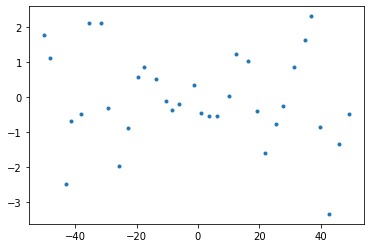

In [9]:
plt.plot(X, Y, '.')
plt.show()

In [10]:
K = np.zeros((row, row))
var_X = np.var(X)
for i in range(row):
    for j in range(row):
        K[i][j] = RQkernel(X[i], X[j], var_X, 1, 1)
print(K)

[[8.71555805e+02 3.23099953e+02 3.27240292e+01 ... 2.01624669e-01
  1.87852824e-01 1.76796823e-01]
 [3.23099953e+02 8.71555805e+02 5.75732469e+01 ... 2.09858617e-01
  1.95249964e-01 1.83544764e-01]
 [3.27240292e+01 5.75732469e+01 8.71555805e+02 ... 2.36666860e-01
  2.19228706e-01 2.05340118e-01]
 ...
 [2.01624669e-01 2.09858617e-01 2.36666860e-01 ... 8.71555805e+02
  1.31937738e+02 4.16228168e+01]
 [1.87852824e-01 1.95249964e-01 2.19228706e-01 ... 1.31937738e+02
  8.71555805e+02 1.61389736e+02]
 [1.76796823e-01 1.83544764e-01 2.05340118e-01 ... 4.16228168e+01
  1.61389736e+02 8.71555805e+02]]


In [11]:
xs = 50
Ks = np.zeros((row))
for i in range(row):
    Ks[i] = RQkernel(xs, X[i], var_X, 1, 1)
print(Ks.shape)

Kss = RQkernel(xs, xs, var_X, 1, 1)
print(Kss)

(34,)
871.5558053830712


In [12]:
min(X)

-50.180387956953886

In [13]:
mean_s = Ks.T @ np.linalg.inv(K) @ Y
var_s = Kss - Ks @ np.linalg.inv(K) @ Ks.T
print(mean_s)
print(var_s)

-0.3278690122836982
427.52296766662073


In [14]:
sample = np.linspace(-60, 60, 1000)
K = np.zeros((row, row))
var_X = 1
a = 500
l = 1
b = 5
for i in range(row):
    for j in range(row):
        K[i][j] = RQkernel(X[i], X[j], var_X, a, l)
mean_y = []
var_y = []
for xs in sample:
    for i in range(row):
        Ks[i] = RQkernel(xs, X[i], var_X, a, l)
    Kss = RQkernel(xs, xs, var_X, a, l) + 1/b
    mean_s = Ks @ np.linalg.inv(K) @ Y
    var_s = Kss - Ks @ np.linalg.inv(K) @ Ks.T
    mean_y.append(mean_s)
    var_y.append(var_s)
mean_y = np.array(mean_y)
var_y = np.array(var_y)

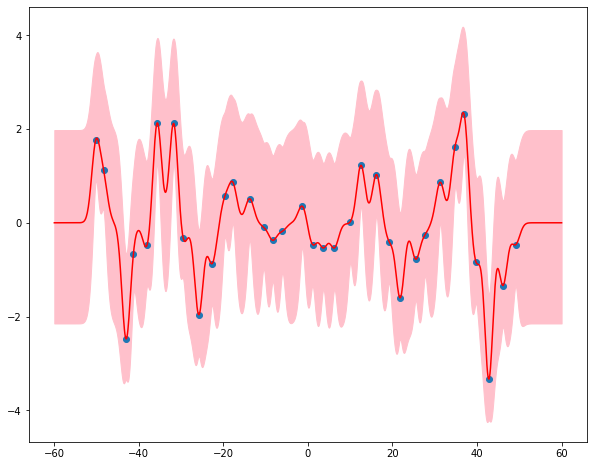

In [15]:
plt.figure(figsize=(10, 8))
plt.plot(X, Y, 'o')
plt.plot(sample, mean_y, 'r')
plt.fill_between(sample, mean_y - 1.96*(var_y**0.5), mean_y + 1.96*(var_y**0.05), color='pink')
plt.show()

In [16]:
Y

array([ 1.77474681,  1.13053693, -2.47591107, -0.66589532, -0.47291983,
        2.13064113,  2.11881381, -0.31968567, -1.96059764, -0.8724174 ,
        0.57400478,  0.86763904,  0.51413651, -0.09810669, -0.37319314,
       -0.18085353,  0.35167108, -0.46329264, -0.53715306, -0.53648933,
        0.02314669,  1.2263043 ,  1.02966212, -0.40330653, -1.59936661,
       -0.77678166, -0.25555392,  0.86417615,  1.62567279,  2.3176344 ,
       -0.84545036, -3.33542934, -1.33809202, -0.4687882 ])

In [17]:
def GetLogLikelihood(X, Y, n, var, alpha, lengthscale):
    K = np.zeros((row, row))
    for i in range(row):
        for j in range(row):
            K[i][j] = RQkernel(X[i], X[j], var, alpha, lengthscale)
            
    return -0.5 * Y.T @ np.linalg.inv(K) @ Y -0.5 * np.log(np.abs(np.linalg.det(K))) - (n/2) * np.log(2 * np.pi) 

In [18]:
x_m = np.arange(1, 50, 1)
L_var_m = []
L_alpha_m = []
L_length_m = []

for i in x_m:
    L = GetLogLikelihood(X, Y, 34, i, 1, 1)
    L_var_m.append(L)
    L = GetLogLikelihood(X, Y, 34, 1, i, 1)
    L_alpha_m.append(L)
    L = GetLogLikelihood(X, Y, 34, 1, 1, i)
    L_length_m.append(L)
x_m.shape

<ipython-input-17-c2c3d0239061>:7: RuntimeWarning: divide by zero encountered in log
  return -0.5 * Y.T @ np.linalg.inv(K) @ Y -0.5 * np.log(np.abs(np.linalg.det(K))) - (n/2) * np.log(2 * np.pi)


(49,)

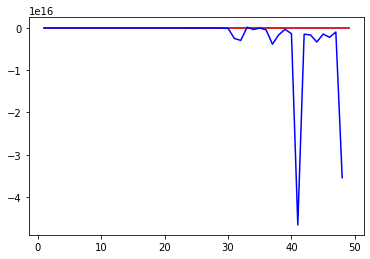

In [19]:
plt.plot(x_m, L_var_m)
plt.plot(x_m, L_alpha_m, 'r')
plt.plot(x_m, L_length_m, 'b')

In [20]:
GetLogLikelihood(X, Y, 34, 1, 1, 1)

-56.94437371517881